In [1]:
import json

In [2]:
file_data = open('sweat16_followers.json')

In [3]:
json_list = []
for line in file_data :
    json_list.append(json.loads(line))

In [4]:
print(json_list[0])

{'Pada_Sweat16': [980080021959135233, 82907531, 739120161005801472, 1889006996, 3760175474, 727149118187929602, 781152879973240850, 957960640135507973, 976249522127962112, 397889504, 354914923, 2752170126, 964081027474849792, 2485270921, 2959676924, 969409776240148480, 3617183598, 969943160527843328, 936579924088930304, 2989736531, 883765617194434560, 979661163406356481, 4453523652, 367067070, 730360193347805184, 979322042469068803, 3157779228, 3282515478, 839522694034960384, 937681462496657409, 897728424990703617, 815108316221165568, 959422094361616384, 1426697190, 117972566, 94096342, 966738476648488960, 797441192497512448, 209049026, 1003927374, 978642991563776000, 948963704908914688, 3187080272, 1268697726, 4886702219, 3161187223, 82279215, 951088638380490752, 973942989285343232, 320828809, 759266394395533312, 965218988941701121, 967731973346095104, 809854750518710272, 850451173324738560, 923804298869219328, 899560384545210368, 951666828622745600, 4881378531, 942106877730492416, 28

In [5]:
from graph_tool.all import *

In [6]:
g = Graph()

In [7]:
print(json_list[0].values())

dict_values([[980080021959135233, 82907531, 739120161005801472, 1889006996, 3760175474, 727149118187929602, 781152879973240850, 957960640135507973, 976249522127962112, 397889504, 354914923, 2752170126, 964081027474849792, 2485270921, 2959676924, 969409776240148480, 3617183598, 969943160527843328, 936579924088930304, 2989736531, 883765617194434560, 979661163406356481, 4453523652, 367067070, 730360193347805184, 979322042469068803, 3157779228, 3282515478, 839522694034960384, 937681462496657409, 897728424990703617, 815108316221165568, 959422094361616384, 1426697190, 117972566, 94096342, 966738476648488960, 797441192497512448, 209049026, 1003927374, 978642991563776000, 948963704908914688, 3187080272, 1268697726, 4886702219, 3161187223, 82279215, 951088638380490752, 973942989285343232, 320828809, 759266394395533312, 965218988941701121, 967731973346095104, 809854750518710272, 850451173324738560, 923804298869219328, 899560384545210368, 951666828622745600, 4881378531, 942106877730492416, 280430

In [8]:
print(list(json_list[0].values()))

[[980080021959135233, 82907531, 739120161005801472, 1889006996, 3760175474, 727149118187929602, 781152879973240850, 957960640135507973, 976249522127962112, 397889504, 354914923, 2752170126, 964081027474849792, 2485270921, 2959676924, 969409776240148480, 3617183598, 969943160527843328, 936579924088930304, 2989736531, 883765617194434560, 979661163406356481, 4453523652, 367067070, 730360193347805184, 979322042469068803, 3157779228, 3282515478, 839522694034960384, 937681462496657409, 897728424990703617, 815108316221165568, 959422094361616384, 1426697190, 117972566, 94096342, 966738476648488960, 797441192497512448, 209049026, 1003927374, 978642991563776000, 948963704908914688, 3187080272, 1268697726, 4886702219, 3161187223, 82279215, 951088638380490752, 973942989285343232, 320828809, 759266394395533312, 965218988941701121, 967731973346095104, 809854750518710272, 850451173324738560, 923804298869219328, 899560384545210368, 951666828622745600, 4881378531, 942106877730492416, 2804308828, 141107

In [10]:
print(list(json_list[0].values())[0])

[980080021959135233, 82907531, 739120161005801472, 1889006996, 3760175474, 727149118187929602, 781152879973240850, 957960640135507973, 976249522127962112, 397889504, 354914923, 2752170126, 964081027474849792, 2485270921, 2959676924, 969409776240148480, 3617183598, 969943160527843328, 936579924088930304, 2989736531, 883765617194434560, 979661163406356481, 4453523652, 367067070, 730360193347805184, 979322042469068803, 3157779228, 3282515478, 839522694034960384, 937681462496657409, 897728424990703617, 815108316221165568, 959422094361616384, 1426697190, 117972566, 94096342, 966738476648488960, 797441192497512448, 209049026, 1003927374, 978642991563776000, 948963704908914688, 3187080272, 1268697726, 4886702219, 3161187223, 82279215, 951088638380490752, 973942989285343232, 320828809, 759266394395533312, 965218988941701121, 967731973346095104, 809854750518710272, 850451173324738560, 923804298869219328, 899560384545210368, 951666828622745600, 4881378531, 942106877730492416, 2804308828, 1411078

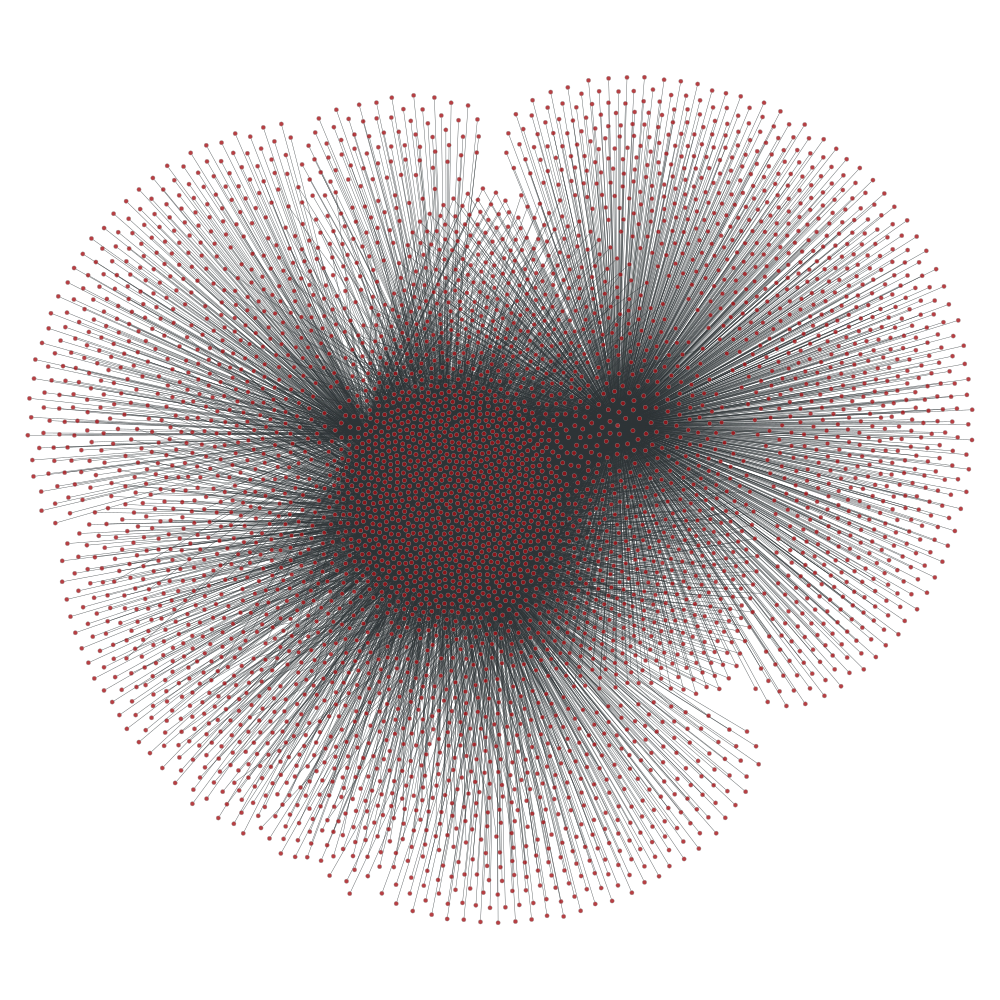

<PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x7f472c1bf860, at 0x7f46e8fbd4e0>

In [12]:
vertex_dict = {}
for member in json_list :
    v_member = g.add_vertex()
    follower_list = list(member.values())[0]
    for follower in follower_list :
        if not follower in vertex_dict.keys() :
            vertex_dict[follower] = g.add_vertex()
        g.add_edge(vertex_dict[follower],v_member)
graph_draw(g, output_size=(1000, 1000), output="graph.png")